In [1]:
# Import statements
from imageio import imread, imwrite
from pylab import *
from skimage.util import img_as_ubyte, img_as_float
import numpy as np
import seaborn as sns
import scipy.integrate
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import imshow
from copy import copy
import os 
import pandas as pd
import sys
# Import local code
bachelorpath = os.path.normpath(os.getcwd() + os.sep + os.pardir)
scriptpath = bachelorpath + '/scripts/'
sys.path.insert(0, scriptpath)
import BP_ratio as bp
import dataset_plotting as dp
import motion_blur as mb 
import velocity as vel
import importlib
importlib.reload(bp)
importlib.reload(dp)
importlib.reload(mb)
importlib.reload(vel)
import tkinter as tk
from tkinter import filedialog

def select_file():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    return file_path
def select_dir():
    root = tk.Tk()
    root.withdraw()
    dir_path = filedialog.askdirectory()
    return dir_path

In [2]:
image = imread(select_file())
im_gray = img_as_float(bp.load_to_colorspace(image, "GRAY"))

(-0.5, 511.5, 511.5, -0.5)

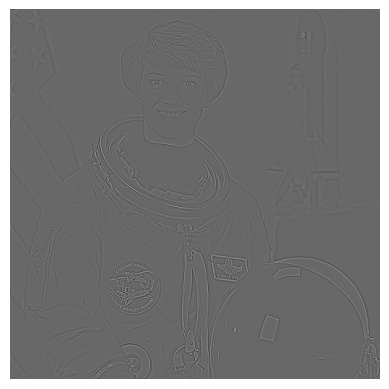

In [3]:
imshow(cv2.Laplacian(im_gray, cv2.CV_32F), cmap="binary")
plt.axis('off')

In [4]:
cv2.Laplacian(im_gray, cv2.CV_32F).var()

0.013635741

In [5]:
csv = pd.read_csv(bachelorpath + '/imu_datasets/AQUALOC/harbor_imu_sequence_01.csv')

In [6]:
slice = csv.iloc[:,4:7]
slice

,a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,-1.995957,-9.463480,0.143400
1,-1.938725,-9.533963,-0.015993
2,-1.993572,-9.566855,-0.182775
3,-1.926802,-9.573903,0.338518
4,-2.041265,-9.456432,0.228030
...,...,...,...
45854,-1.087403,-9.703122,-0.134797
45855,-1.015863,-9.541011,-0.173637
45856,-1.173251,-9.909871,0.058770
45857,-0.856091,-9.684326,-0.388398


In [7]:
dt = csv["#timestamp [ns]"].diff().mean() * 10**-9
dt

0.0050027993019102455

In [8]:
x = vel.convert_slice_to_list(slice, 0)
y = vel.convert_slice_to_list(slice, 1)
z = vel.convert_slice_to_list(slice, 2)

In [9]:
dt = vel.compute_average_dt(csv, "AQUALOC")
time = vel.get_time(csv, dt)
x_v = vel.calculate_velocity_scipy(x, time)
y_v = vel.calculate_velocity_scipy(y, time)
z_v = vel.calculate_velocity_scipy(z, time)
df = pd.DataFrame()
vel.add_to_dataframe(df,x_v, "x")
vel.add_to_dataframe(df,y_v, "y")
vel.add_to_dataframe(df,z_v, "z")

,x,y,z
0,-0.009842,-0.047521,0.000319
1,-0.019679,-0.095301,-0.000179
2,-0.029486,-0.143181,0.000211
3,-0.039411,-0.190784,0.001628
4,-0.049212,-0.238159,0.002182
...,...,...,...
45853,-224.649269,-2190.771665,-118.087204
45854,-224.654530,-2190.819804,-118.087976
45855,-224.660006,-2190.868459,-118.088263
45856,-224.665083,-2190.917473,-118.089088


In [11]:
df.apply(np.linalg.norm, axis=1)

0           0.048531
1           0.097312
2           0.146185
3           0.194819
4           0.243200
            ...     
45853    2205.423400
45854    2205.471795
45855    2205.520701
45856    2205.569950
45857    2205.618478
Length: 45858, dtype: float64